# Thinkful Final Capstone-NLP Sentiment Analysis on IMDB Dataset of over 50K movie reviews
## By Archana Nagarajan

# Introduction 
Natural Language Processing (NLP) is a form of artificial intelligence and is a method for humans and computers to interact on a language platform. The pinnacle goal of NLP is to draw meaning from text and understand it in a detailed manner to make it valuable. Since Thinkful did not cover NLP in my curriculum, I decided to take on the challenge of teaching myself basic NLP principles, EDA, and analysis as I have had an interest in learning more about it. 

# Data
I have chosen to carry out an NLP project for my final capstone using the IMDB 50k Movie Review Dataset and undertaking a sentiment analysis project. I sourced the data from kaggle:https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
and the author of this dataset entry is Lakshmipathi N. 

# Methods
This is a nice data set which contains 25K positive movie reviews, and 25K negative movie reviews, which makes it a great balanced set to work with. I want to learn more about what in the text itself qualifies it as a postive or negative review. In order to even approach this question, EDA is needed to get rid of null values and clean up the data. This will require me to get rid fo the HTML tags etc in the data because it is sourced from line. Then, in classic NLP style, I will have to change the text into a form that can be accepted in machine learning models. I will vectorize the words using the Tfidf and Count Vectorization methods and then test out which method is better in three different machine learning models: SVM, Multinomial Naive Bayes, and Random Forest--all in their classification methods since this is a binary problem: is the review negative or positive. I will use the proper metrics to determine how accurate and precise are these models in determining if the movie review is negative or positive. 

# Central Question
Based on the text given, can my model properly classify if the movie review from this IMDB dataset is negative or positive in a precise and accurate manner?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#pinning data and uploading file
#import pandas as pd
#df = pd.read_csv('C:/Users/Ajibola/Documents/mpg.csv', encoding = 'utf-16')
#mpg.head()

In [4]:
#capturing data into a dataframe
import io
df = pd.read_csv("IMDB Dataset.csv")

In [5]:
#getting an overview of the data to ensure that it was properly upload
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
#getting a look at the type of data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
#looking at if the dataset is balanced with negative and positive reviews 
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [8]:
#randomly selecting a review text to see if it needs any cleaning 
review = df['review'].loc[55]
review

"As someone has already mentioned on this board, it's very difficult to make a fake documentary. It requires tremendous skill, pacing, patience, directorial 'distance,' a plausible premise, a narrative 'flow,' and REALLY believable acting (aka GREAT acting). <br /><br />Such is not the case with 'Love Machine'. It starts to show its faux hand about the 20-minute mark (with 60 minutes left to watch), and the viewer starts to realize that he or she is being taken in. It's downhill from there.<br /><br />Director Gordon Eriksen simply peaked too soon. But to be fair to Eriksen, his problems started early: as he explains in the extras, he began wanting to do a REAL doc, couldn't get funding, and settled for a cheaper way of making his film.<br /><br />The premise -- people who have secret lives by posting themselves on a porn website -- was perhaps more interesting in 1997-98, when the film was made. Eriksen does a lot of tricky stuff -- a pushy 'host,' hand-held cameras, zooms, grainy bla

In [9]:
#cleaning the text to remove HTML characteristics of one sample so that this can then be applied to entire dataset
from bs4 import BeautifulSoup
soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

"As someone has already mentioned on this board, it's very difficult to make a fake documentary. It requires tremendous skill, pacing, patience, directorial 'distance,' a plausible premise, a narrative 'flow,' and REALLY believable acting (aka GREAT acting). Such is not the case with 'Love Machine'. It starts to show its faux hand about the 20-minute mark (with 60 minutes left to watch), and the viewer starts to realize that he or she is being taken in. It's downhill from there.Director Gordon Eriksen simply peaked too soon. But to be fair to Eriksen, his problems started early: as he explains in the extras, he began wanting to do a REAL doc, couldn't get funding, and settled for a cheaper way of making his film.The premise -- people who have secret lives by posting themselves on a porn website -- was perhaps more interesting in 1997-98, when the film was made. Eriksen does a lot of tricky stuff -- a pushy 'host,' hand-held cameras, zooms, grainy blacks and whites -- all, I guess, to e

In [10]:
#removing all other content except for upper and lower case letters
import re
review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z]', ' ', review)
review

'As someone has already mentioned on this board  it s very difficult to make a fake documentary  It requires tremendous skill  pacing  patience  directorial  distance   a plausible premise  a narrative  flow   and REALLY believable acting  aka GREAT acting   Such is not the case with  Love Machine   It starts to show its faux hand about the    minute mark  with    minutes left to watch   and the viewer starts to realize that he or she is being taken in  It s downhill from there Director Gordon Eriksen simply peaked too soon  But to be fair to Eriksen  his problems started early  as he explains in the extras  he began wanting to do a REAL doc  couldn t get funding  and settled for a cheaper way of making his film The premise    people who have secret lives by posting themselves on a porn website    was perhaps more interesting in          when the film was made  Eriksen does a lot of tricky stuff    a pushy  host   hand held cameras  zooms  grainy blacks and whites    all  I guess  to e

In [11]:
#changing the contents to lowercase 
review= review.lower()
review

'as someone has already mentioned on this board  it s very difficult to make a fake documentary  it requires tremendous skill  pacing  patience  directorial  distance   a plausible premise  a narrative  flow   and really believable acting  aka great acting   such is not the case with  love machine   it starts to show its faux hand about the    minute mark  with    minutes left to watch   and the viewer starts to realize that he or she is being taken in  it s downhill from there director gordon eriksen simply peaked too soon  but to be fair to eriksen  his problems started early  as he explains in the extras  he began wanting to do a real doc  couldn t get funding  and settled for a cheaper way of making his film the premise    people who have secret lives by posting themselves on a porn website    was perhaps more interesting in          when the film was made  eriksen does a lot of tricky stuff    a pushy  host   hand held cameras  zooms  grainy blacks and whites    all  i guess  to e

In [12]:
review= review.split()
review

['as',
 'someone',
 'has',
 'already',
 'mentioned',
 'on',
 'this',
 'board',
 'it',
 's',
 'very',
 'difficult',
 'to',
 'make',
 'a',
 'fake',
 'documentary',
 'it',
 'requires',
 'tremendous',
 'skill',
 'pacing',
 'patience',
 'directorial',
 'distance',
 'a',
 'plausible',
 'premise',
 'a',
 'narrative',
 'flow',
 'and',
 'really',
 'believable',
 'acting',
 'aka',
 'great',
 'acting',
 'such',
 'is',
 'not',
 'the',
 'case',
 'with',
 'love',
 'machine',
 'it',
 'starts',
 'to',
 'show',
 'its',
 'faux',
 'hand',
 'about',
 'the',
 'minute',
 'mark',
 'with',
 'minutes',
 'left',
 'to',
 'watch',
 'and',
 'the',
 'viewer',
 'starts',
 'to',
 'realize',
 'that',
 'he',
 'or',
 'she',
 'is',
 'being',
 'taken',
 'in',
 'it',
 's',
 'downhill',
 'from',
 'there',
 'director',
 'gordon',
 'eriksen',
 'simply',
 'peaked',
 'too',
 'soon',
 'but',
 'to',
 'be',
 'fair',
 'to',
 'eriksen',
 'his',
 'problems',
 'started',
 'early',
 'as',
 'he',
 'explains',
 'in',
 'the',
 'extras',
 

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
review = [word for word in review if not word in set(stopwords.words('english'))]
review

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['someone',
 'already',
 'mentioned',
 'board',
 'difficult',
 'make',
 'fake',
 'documentary',
 'requires',
 'tremendous',
 'skill',
 'pacing',
 'patience',
 'directorial',
 'distance',
 'plausible',
 'premise',
 'narrative',
 'flow',
 'really',
 'believable',
 'acting',
 'aka',
 'great',
 'acting',
 'case',
 'love',
 'machine',
 'starts',
 'show',
 'faux',
 'hand',
 'minute',
 'mark',
 'minutes',
 'left',
 'watch',
 'viewer',
 'starts',
 'realize',
 'taken',
 'downhill',
 'director',
 'gordon',
 'eriksen',
 'simply',
 'peaked',
 'soon',
 'fair',
 'eriksen',
 'problems',
 'started',
 'early',
 'explains',
 'extras',
 'began',
 'wanting',
 'real',
 'doc',
 'get',
 'funding',
 'settled',
 'cheaper',
 'way',
 'making',
 'film',
 'premise',
 'people',
 'secret',
 'lives',
 'posting',
 'porn',
 'website',
 'perhaps',
 'interesting',
 'film',
 'made',
 'eriksen',
 'lot',
 'tricky',
 'stuff',
 'pushy',
 'host',
 'hand',
 'held',
 'cameras',
 'zooms',
 'grainy',
 'blacks',
 'whites',
 'guess'

In [14]:
#lemmantizing words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review_s = [ps.stem(word) for word in review]
review_s

['someon',
 'alreadi',
 'mention',
 'board',
 'difficult',
 'make',
 'fake',
 'documentari',
 'requir',
 'tremend',
 'skill',
 'pace',
 'patienc',
 'directori',
 'distanc',
 'plausibl',
 'premis',
 'narr',
 'flow',
 'realli',
 'believ',
 'act',
 'aka',
 'great',
 'act',
 'case',
 'love',
 'machin',
 'start',
 'show',
 'faux',
 'hand',
 'minut',
 'mark',
 'minut',
 'left',
 'watch',
 'viewer',
 'start',
 'realiz',
 'taken',
 'downhil',
 'director',
 'gordon',
 'eriksen',
 'simpli',
 'peak',
 'soon',
 'fair',
 'eriksen',
 'problem',
 'start',
 'earli',
 'explain',
 'extra',
 'began',
 'want',
 'real',
 'doc',
 'get',
 'fund',
 'settl',
 'cheaper',
 'way',
 'make',
 'film',
 'premis',
 'peopl',
 'secret',
 'live',
 'post',
 'porn',
 'websit',
 'perhap',
 'interest',
 'film',
 'made',
 'eriksen',
 'lot',
 'tricki',
 'stuff',
 'pushi',
 'host',
 'hand',
 'held',
 'camera',
 'zoom',
 'graini',
 'black',
 'white',
 'guess',
 'elicit',
 'sens',
 'authent',
 'work',
 'film',
 'confus',
 'forc',

In [15]:
nltk.download('all')
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\archn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\archn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\archn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\archn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\archn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\a

['someone',
 'already',
 'mentioned',
 'board',
 'difficult',
 'make',
 'fake',
 'documentary',
 'requires',
 'tremendous',
 'skill',
 'pacing',
 'patience',
 'directorial',
 'distance',
 'plausible',
 'premise',
 'narrative',
 'flow',
 'really',
 'believable',
 'acting',
 'aka',
 'great',
 'acting',
 'case',
 'love',
 'machine',
 'start',
 'show',
 'faux',
 'hand',
 'minute',
 'mark',
 'minute',
 'left',
 'watch',
 'viewer',
 'start',
 'realize',
 'taken',
 'downhill',
 'director',
 'gordon',
 'eriksen',
 'simply',
 'peaked',
 'soon',
 'fair',
 'eriksen',
 'problem',
 'started',
 'early',
 'explains',
 'extra',
 'began',
 'wanting',
 'real',
 'doc',
 'get',
 'funding',
 'settled',
 'cheaper',
 'way',
 'making',
 'film',
 'premise',
 'people',
 'secret',
 'life',
 'posting',
 'porn',
 'website',
 'perhaps',
 'interesting',
 'film',
 'made',
 'eriksen',
 'lot',
 'tricky',
 'stuff',
 'pushy',
 'host',
 'hand',
 'held',
 'camera',
 'zoom',
 'grainy',
 'black',
 'white',
 'guess',
 'elicit

In [16]:
#merging words after NLP clean up
review = ' '.join(review)
review

'someone already mentioned board difficult make fake documentary requires tremendous skill pacing patience directorial distance plausible premise narrative flow really believable acting aka great acting case love machine start show faux hand minute mark minute left watch viewer start realize taken downhill director gordon eriksen simply peaked soon fair eriksen problem started early explains extra began wanting real doc get funding settled cheaper way making film premise people secret life posting porn website perhaps interesting film made eriksen lot tricky stuff pushy host hand held camera zoom grainy black white guess elicit sense authenticity work film confusing forced ultimately brings believability actor pretty awful dialogue'

In [17]:
#bringing text into math form 
summation = []
summation.append(review)

In [18]:
#vectorizing text 
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
review_count_vec = count_vec.fit_transform(summation)
review_count_vec.toarray()

array([[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [19]:
count_vec_bin = CountVectorizer(binary=True)
review_count_vec_bin = count_vec_bin.fit_transform(summation)
review_count_vec_bin.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [20]:
#checking for frequencies 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
review_tfidf_vec = tfidf_vec.fit_transform(summation)
review_tfidf_vec.toarray()

array([[0.1774713 , 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.26620695, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.26620695, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.1774713 , 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.1774713 , 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.1774713 , 0.08873565, 0.08873565, 0.08873565, 0.08873565,
        0.08873565, 0.08873565, 0.08873565, 0.08

In [21]:
#splitting data into train and test data with an 80/20 split 
from sklearn.model_selection import train_test_split
train_data, test_data, train_data_label, test_data_label = train_test_split(df['review'], df['sentiment'], test_size=0.20, random_state=3939)

In [22]:
#converting positive and negative results into numerical values
train_data_label = (train_data_label.replace({'positive': 1, 'negative': 0})).values
test_data_label  = (test_data_label.replace({'positive': 1, 'negative': 0})).values

In [23]:
#applying previous data cleaning methods to the entire train/test dataset
total_train = []


for i in range(train_data.shape[0]):
  soup = BeautifulSoup(train_data.iloc[i], "html.parser")
  review = soup.get_text()
  review = re.sub('\[[^]]*\]', ' ', review)
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
  review = review.split()
  review = [word for word in review if not word in set(stopwords.words('english'))]
  lem = WordNetLemmatizer()
  review = [lem.lemmatize(word) for word in review]
  review = ' '.join(review)
  total_train.append(review)
    


In [24]:
total_test  = []
for j in range(test_data.shape[0]):
  soup = BeautifulSoup(test_data.iloc[j], "html.parser")
  review = soup.get_text()
  review = re.sub('\[[^]]*\]', ' ', review)
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
  review = review.split()
  review = [word for word in review if not word in set(stopwords.words('english'))]
  lem = WordNetLemmatizer()
  review = [lem.lemmatize(word) for word in review]
  review = ' '.join(review)
  total_test.append(review)

In [25]:
#checking to make sure that previous code worked with the train data
total_train[-11]

'ok start saw screening couple week ago shocked bad movie sure love beverly hillbilly green acre bad acting think best tv show air definitely love movie personally really like george work talented comedy forte people natural comedy sure great funny work personally comedy pull big screen cute movie would pay see h seen would recommend anyone spend money george buddy love please comedy script lacking lot great concept'

In [26]:
#checking to make sure that previous code worked with test data
total_test[-11]

'year original film goodbye mr chip made musical peter toole petula clarke starred wonderful remake beloved schoolteacher chippington referred chip beloved wife toole excellent received another oscar nomination wonder peter toole win oscar lost coveted award time also wonder lost john wayne true grit really testament mr wayne long career popularity year also marked great performance richard burton anne thousand day well dustin hoffman jon voight midnight cowboy surprised see petula clarke cast mr chippington however musical beautiful voice came well nice piece acting well forget scene chip carry class despite news beloved killed bombing never got tell wonderful news pending promotion beautiful cinematography music enhanced truly memorable experience'

In [27]:
#using the TF-IDF way to vectorize data
tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vec_train = tfidf_vec.fit_transform(total_train)
tfidf_vec_test = tfidf_vec.transform(total_test)

In [28]:
#now using SVM (Linear SVC) to as a model 
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(C=0.5, random_state=333)
linear_svc.fit(tfidf_vec_train, train_data_label)
prediction = linear_svc.predict(tfidf_vec_test)

In [29]:
#checking the performance of Linear SVC model with TD-IDF vectorization method
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report: \n", classification_report(test_data_label, prediction,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, prediction))
print("Accuracy: \n", accuracy_score(test_data_label, prediction))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4994
    Positive       0.89      0.92      0.90      5006

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix: 
 [[4421  573]
 [ 414 4592]]
Accuracy: 
 0.9013


In [30]:
#using CountVectorizer to vectorize data as another method 
count_vec = CountVectorizer(ngram_range=(1, 3), binary=False)
count_vec_train = count_vec.fit_transform(total_train)
count_vec_test = count_vec.transform(total_test)

In [31]:
#running SVM (Linear SVC) with this CountVectorizer 
linear_svc_count = LinearSVC(C=0.5, random_state=333, max_iter=50000)
linear_svc_count.fit(count_vec_train, train_data_label)
prediction_count = linear_svc_count.predict(count_vec_test)

In [32]:
#analyzing performance of Linear SVC with CountVectorizer
print("Classification Report: \n", classification_report(test_data_label, prediction_count,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, prediction_count))
print("Accuracy: \n", accuracy_score(test_data_label, prediction_count))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4994
    Positive       0.90      0.91      0.90      5006

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix: 
 [[4464  530]
 [ 467 4539]]
Accuracy: 
 0.9003


In [33]:
#using CountVectorizer with binary to vectorize data 
ind_vec = CountVectorizer(ngram_range=(1, 3), binary=True)
ind_vec_train = ind_vec.fit_transform(total_train)
ind_vec_test = ind_vec.transform(total_test)

In [34]:
#using SVM (linear SVC) model with CountVectorizer/binary data
linear_svc_ind = LinearSVC(C=0.5, random_state=33333)
linear_svc_ind.fit(ind_vec_train, train_data_label)
prediction_ind = linear_svc_ind.predict(ind_vec_test)

C:\Users\archn\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [35]:
#analyzing performance of Linear SVC model with CountVectorizer/binary data
print("Classification Report: \n", classification_report(test_data_label, prediction_ind,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, prediction_ind))
print("Accuracy: \n", accuracy_score(test_data_label, prediction_ind))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4994
    Positive       0.89      0.91      0.90      5006

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix: 
 [[4459  535]
 [ 462 4544]]
Accuracy: 
 0.9003


In [36]:
#performance wise, TF-IDF and Linear SVM combo seem to have the best results given classification report, confusion matrix, and accuracy 

In [37]:
#using Multinomial Naive Bayes classifier as a model for data
tfidf_vec_NB = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vec_train_NB = tfidf_vec_NB.fit_transform(total_train)

tfidf_vec_test_NB = tfidf_vec_NB.transform(total_test)

print(tfidf_vec_train_NB.toarray().shape, tfidf_vec_test_NB.toarray().shape)

(40000, 83372) (10000, 83372)


In [38]:
#using chi square to detect the top 4000 features
from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=40000)
tfidf_vec_train_NB = ch2.fit_transform(tfidf_vec_train_NB, train_data_label)
tfidf_vec_test_NB  = ch2.transform(tfidf_vec_test_NB)

In [39]:
#checking for my top feature...for curiosity! 
feature_names = tfidf_vec_NB.get_feature_names()
feature_names = [feature_names[i] for i
                         in ch2.get_support(indices=True)]
feature_names = np.asarray(feature_names)
feature_names[39]

'abasing'

In [40]:
#fitting data to MNB for Tfidf method
from sklearn.naive_bayes import MultinomialNB

multi_clf = MultinomialNB()
multi_clf.fit(tfidf_vec_train_NB, train_data_label)

predict_NB = multi_clf.predict(tfidf_vec_test_NB)

In [48]:
#let us take a look at the performance of MNB using Tfidf method
print("Classification Report: \n", classification_report(test_data_label, predict_NB,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_NB))
print("Accuracy: \n", accuracy_score(test_data_label, predict_NB))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.86      0.88      0.87      4994
    Positive       0.87      0.86      0.87      5006

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Confusion Matrix: 
 [[4379  615]
 [ 720 4286]]
Accuracy: 
 0.8665


In [49]:
#running MNB with Count Vectorizer method
count_vec_NB = CountVectorizer(ngram_range=(1, 3), binary=False)
count_vec_train_NB = count_vec_NB.fit_transform(total_train)
count_vec_test_NB = count_vec_NB.transform(total_test)

In [50]:
#fitting Count Vectorizer method with MNB data
multi_clf_count = MultinomialNB()
multi_clf_count.fit(count_vec_train_NB, train_data_label)

predict_NB_count = multi_clf_count.predict(count_vec_test_NB)

In [51]:
#let us take a look at the performance of MNB using Count Vectorizer method
print("Classification Report: \n", classification_report(test_data_label, predict_NB_count,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_NB_count))
print("Accuracy: \n", accuracy_score(test_data_label, predict_NB_count))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      4994
    Positive       0.89      0.89      0.89      5006

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix: 
 [[4445  549]
 [ 562 4444]]
Accuracy: 
 0.8889


In [54]:
from sklearn.linear_model import LogisticRegressionCV

In [57]:
#training the model using Logistic regression classifier with Tfdif method
clf = LogisticRegressionCV(cv=5,
random_state=0,
n_jobs=-1,
verbose=3,
max_iter=300).fit(tfidf_vec_train, train_data_label)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 20.1min remaining: 30.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 25.1min finished


In [58]:
#testing the model with data
clf_predict_tfidf=clf.predict(tfidf_vec_test)

In [59]:
#let us take a look at the performance of CLF using tfidf Vectorizer method
print("Classification Report: \n", classification_report(test_data_label, clf_predict_tfidf,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, clf_predict_tfidf))
print("Accuracy: \n", accuracy_score(test_data_label, clf_predict_tfidf))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.89      0.90      4994
    Positive       0.90      0.92      0.91      5006

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix: 
 [[4455  539]
 [ 403 4603]]
Accuracy: 
 0.9058


In [60]:
#training the model using Logistic regression classifier with Count Vectorizer method
clf = LogisticRegressionCV(cv=5,
random_state=0,
n_jobs=-1,
verbose=3,
max_iter=300).fit(count_vec_train, train_data_label)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 40.7min remaining: 61.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 41.7min finished


In [62]:
#testing the model with data
clf_predict_count=clf.predict(count_vec_test)

In [64]:
#let us take a look at the performance of CLF using Count Vectorizer method
print("Classification Report: \n", classification_report(test_data_label, clf_predict_count,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, clf_predict_count))
print("Accuracy: \n", accuracy_score(test_data_label, clf_predict_count))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4994
    Positive       0.90      0.91      0.90      5006

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix: 
 [[4464  530]
 [ 457 4549]]
Accuracy: 
 0.9013


In [66]:
!pip install wordcloud

In [67]:
from wordcloud import WordCloud,STOPWORDS

<function matplotlib.pyplot.show(*args, **kw)>

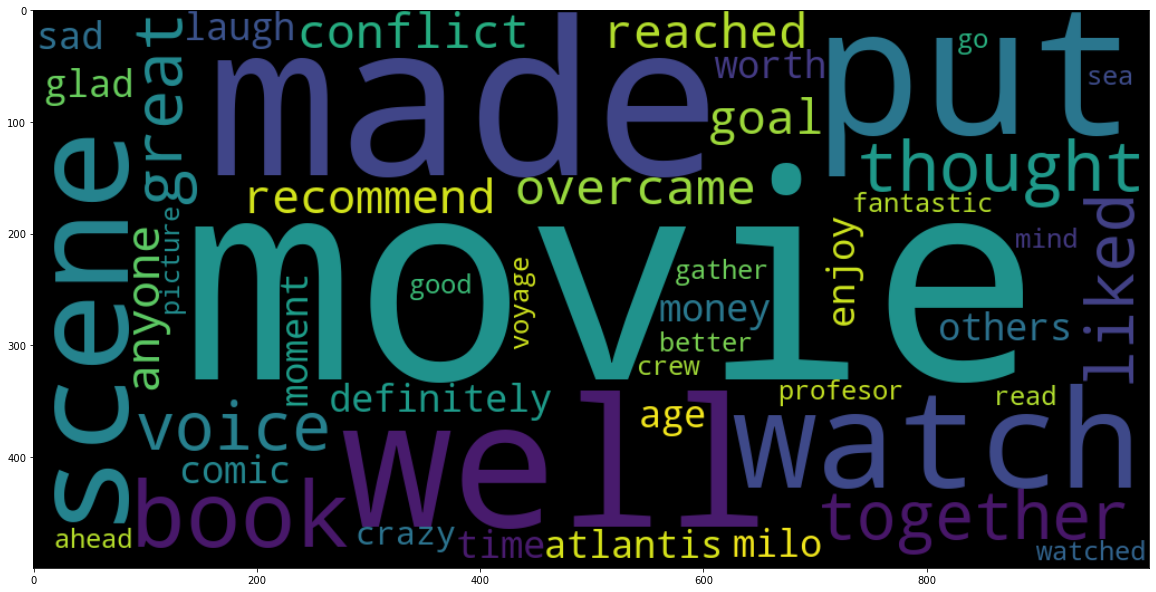

In [77]:
#creating a word cloud just for fun!
#word cloud for positive review words
plt.figure(figsize=(20,20))
positive_text=total_train[2410]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

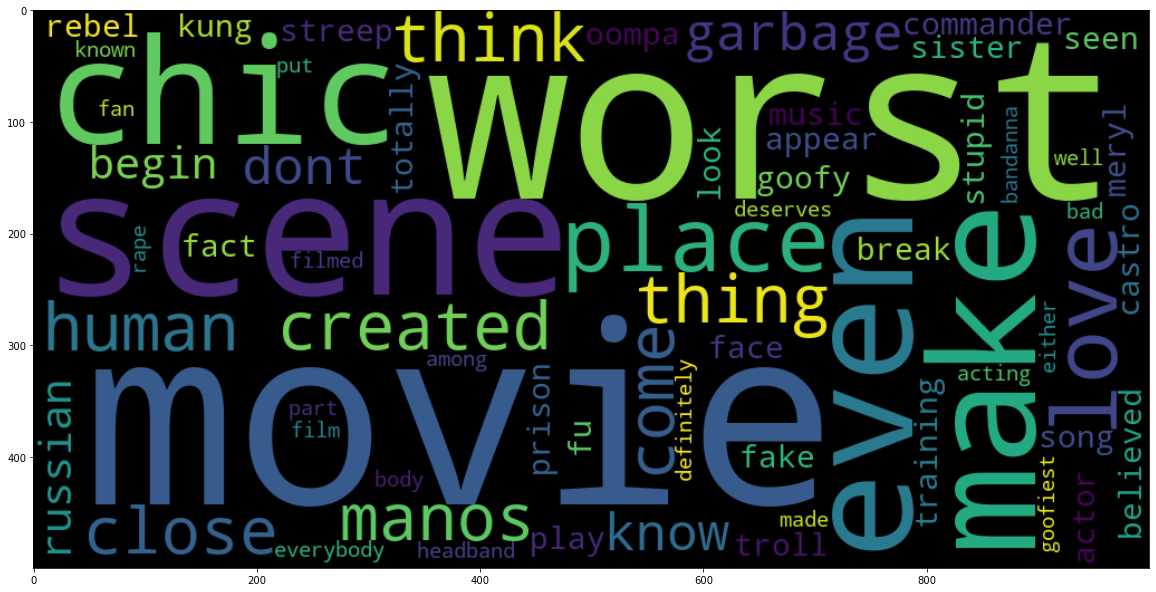

In [76]:
#word cloud for negative review words
plt.figure(figsize=(20,20))
negative_text=total_train[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

# Results
Based on my analysis, I have come to the following conclusions:
After utilizing both the Tfdif and Count Vectorization methods and using the following supervised machine learning classification models: Logisitic regression, Multinomial naive bayes, and SVM, on both vectorization methods, there appears to be a somewhat clear winner in terms of prediction accuracy. All models seemed to perform relatively well with high accuracy and F1 scores however, using a Logisitic regression classifer with the Tfdif method had the best accuracy, presicion, recall, and F1 scores compared to the others. The multinomial naive bayes model did not perform well as the other models for both the Tfdif and Count vectorization methods. It looks like Logistic regression worked best as a classification model for this IMBD movie review sentiment analysis.  

# Conclusions/ Impact 
My solution, by using NLP, to determine the sentiment of IMDB movie reviews will be useful for multiple entertainment data companies to have a quick method to see what the tone of the review is. It will also be useful to get a summary of the performance of a movie, and do so with a large dataset. This capstone was a great oppurtunity for me to learn more about NLP analysis, which is a useful AI skill to have and a great idea for a final project for Thinkful :-)